## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Construct cells immediately below this that input and interrogate a corpus relating to your anticipated final project. This could include one of the Davies corpora or some other you have constructed. Turn your text into an nltk `Text` object, and explore all of the features examined above, and others that relate to better understanding your corpus in relation to your research question. </span>

In [ ]:
!pip install git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

  Cloning git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to /tmp/pip-req-build-ypb0p433
  Running command git clone -q git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-ypb0p433
     |████████████████████████████████| 5.5MB 5.2MB/s 
     |████████████████████████████████| 122kB 29.6MB/s 
     |████████████████████████████████| 163kB 56.7MB/s 
     |████████████████████████████████| 81kB 8.6MB/s 
     |████████████████████████████████| 133kB 50.3MB/s 
     |████████████████████████████████| 32.8MB 105kB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 5.1MB 21.9MB/s 
     |████████████████████████████████| 71kB 6.3MB/s 
     |████████████████████████████████| 7.2MB 44.4MB/s 
  Created wheel for lucem-illud: filename=lucem_illud-8.0.1-cp36-none-any.whl size=34916 sha256=e0be9807ee56ba9a1077cc4f12efeef30e165662a99e8fa5cabf336690d75384
  Stored in directory: /tmp/pip-ephem-wh

In [ ]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud #just in case, regularly update your lucem_illud with the following code: pip install git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
corpus_name = "/content/drive/My Drive/Colab Notebooks/TV" 
# corpus_name = "Movies"

In [ ]:
def loadcorpus(corpus_name, corpus_style="text"):
    texts_raw = {}
    for file in os.listdir(corpus_name + "/"):
        if corpus_style in file:
            print(file)
            zfile = zipfile.ZipFile(corpus_name + "/" + file)
            for file in zfile.namelist():
                texts_raw[file] = []
                with zfile.open(file) as f:
                    for line in f:
                        texts_raw[file].append(line)
    return texts_raw

In [ ]:
TV_raw = loadcorpus(corpus_name)

text_00_myn.zip
text_01_ote.zip
text_02_mqu.zip
text_03_mnq.zip
text_04_mlq.zip
text_05_nko.zip
text_06_eyp.zip
text_07_oma.zip
text_08_loh.zip
text_09_jex.zip
text_10_aoy.zip
text_11_uoy.zip
text_12_rcq.zip
text_13_idi.zip
text_14_lnc.zip
text_15_guo.zip
text_16_qll.zip
text_17_arp.zip
text_18_jfj.zip
text_19_gvc.zip
text_20_cde.zip
text_21_fqa.zip
text_22_etp.zip
text_23_fmh.zip
text_24_ywo.zip
text_25_byg.zip
text_26_ngj.zip
text_27_fle.zip
text_28_rfy.zip
text_29_oye.zip
text_30_wkp.zip
text_31_akv.zip
text_32_ldf.zip
text_33_kje.zip


In [ ]:
print(TV_raw.keys())

dict_keys(['00.txt', '01.txt', '02.txt', '03.txt', '04.txt', '05.txt', '06.txt', '07.txt', '08.txt', '09.txt', '10.txt', '11.txt', '12.txt', '13.txt', '14.txt', '15.txt', '16.txt', '17.txt', '18.txt', '19.txt', '20.txt', '21.txt', '22.txt', '23.txt', '24.txt', '25.txt', '26.txt', '27.txt', '28.txt', '29.txt', '30.txt', '31.txt', '32.txt', '33.txt'])


In [ ]:
TV_raw['02.txt'][0:2]

[b'\r\n',
 b"@@6409139 [theme_music_plays] coughs , wheezes [man_over_PA] Flight deck to Chief Guard . We 'll be making an Earth orbit pass in five minutes . Prepare for landing . Yes , sir . [computer_whirring] Come on . Let 's check the prisoners . Your attention and look this way ! ln a few minutes , we 'll be making an Earth entry . ln ten , you 'll be getting out of your bunks and moving through the Liberty Corridor . Now , you 've all been good boys so far . We 've had a nice trip . But until you get your discharge papers , let me remind you of one thing ... You are still convicts ! Which means that we do n't want any trouble in our last minutes together . I want no demonstrations , no cracks about the Interstellar Prison Service once we 've landed , no sneaky tricks of any kind . Because if you 've got anything like that in mind , there 's me , there 's my friend and there are these prods . Most of you have had a tickle or two from them . So you know what I @ @ @ @ @ @ @ @ @ @ o

In [ ]:
def clean_raw_text(raw_texts):
    clean_texts = []
    for text in raw_texts:
        try:
            text = text.decode("utf-8")
            # !!!!!!!!!
            clean_text = text.replace(" \'t", "'t").replace(" \'m", "'m").replace(" \'ll", "'ll").replace(" \'re", "'re").replace(" \'s", "'s").replace(" \'re", "'re").replace(" n\'t", "n't").replace(" \'ve", "'ve").replace(" /'d", "'d")
            # clean_text = re.sub(r'\\', "", text)
            # cleaned_paragraph = re.sub(r'Â©', "", paragraph) # Remove non-readable characters
            clean_texts.append(clean_text)
        except AttributeError:
            # print("ERROR CLEANING")
            # print(text)
            continue
        except UnicodeDecodeError:
            # print("Unicode Error, Skip")
            continue
    return clean_texts

In [ ]:
clean_02 = clean_raw_text(TV_raw['02.txt'])

In [ ]:
clean_02[:2]

['\r\n',
 "@@6409139 [theme_music_plays] coughs , wheezes [man_over_PA] Flight deck to Chief Guard . We'll be making an Earth orbit pass in five minutes . Prepare for landing . Yes , sir . [computer_whirring] Come on . Let's check the prisoners . Your attention and look this way ! ln a few minutes , we'll be making an Earth entry . ln ten , you'll be getting out of your bunks and moving through the Liberty Corridor . Now , you've all been good boys so far . We've had a nice trip . But until you get your discharge papers , let me remind you of one thing ... You are still convicts ! Which means that we don't want any trouble in our last minutes together . I want no demonstrations , no cracks about the Interstellar Prison Service once we've landed , no sneaky tricks of any kind . Because if you've got anything like that in mind , there's me , there's my friend and there are these prods . Most of you have had a tickle or two from them . So you know what I @ @ @ @ @ @ @ @ @ @ one another . 

In [ ]:
nlp = spacy.load("en")

In [ ]:
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

In [ ]:
word_tokenize(clean_02[1])

['@@6409139',
 'theme_music_plays',
 'coughs',
 'wheezes',
 'man_over_PA',
 'Flight',
 'deck',
 'to',
 'Chief',
 'Guard',
 'We',
 "'ll",
 'be',
 'making',
 'an',
 'Earth',
 'orbit',
 'pass',
 'in',
 'five',
 'minutes',
 'Prepare',
 'for',
 'landing',
 'Yes',
 'sir',
 'computer_whirring',
 'Come',
 'on',
 'Let',
 "'s",
 'check',
 'the',
 'prisoners',
 'Your',
 'attention',
 'and',
 'look',
 'this',
 'way',
 'ln',
 'a',
 'few',
 'minutes',
 'we',
 "'ll",
 'be',
 'making',
 'an',
 'Earth',
 'entry',
 'ln',
 'ten',
 'you',
 "'ll",
 'be',
 'getting',
 'out',
 'of',
 'your',
 'bunks',
 'and',
 'moving',
 'through',
 'the',
 'Liberty',
 'Corridor',
 'Now',
 'you',
 "'ve",
 'all',
 'been',
 'good',
 'boys',
 'so',
 'far',
 'We',
 "'ve",
 'had',
 'a',
 'nice',
 'trip',
 'But',
 'until',
 'you',
 'get',
 'your',
 'discharge',
 'papers',
 'let',
 'me',
 'remind',
 'you',
 'of',
 'one',
 'thing',
 'You',
 'are',
 'still',
 'convicts',
 'Which',
 'means',
 'that',
 'we',
 'do',
 "n't",
 'want',
 'a

In [ ]:
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)

In [ ]:
counted_words = wordCounter(word_tokenize(clean_02[1]))
counted_words[:10]

,word,count
0,@@6409139,1
1,theme_music_plays,1
2,coughs,1
3,wheezes,1
4,man_over_pa,3
5,flight,1
6,deck,1
7,to,191
8,chief,2
9,guard,1


In [ ]:
#Doing this in place (changing the original DataFrame) as we don't need the unsorted DataFrame
counted_words.sort_values('count', ascending=False, inplace=True)
counted_words[:20]

,word,count
45,you,329
88,i,313
32,the,206
7,to,191
124,it,161
79,that,141
41,a,121
36,and,120
30,'s,98
81,n't,96


In [ ]:
import nltk

In [ ]:
TV_tokens = word_tokenize(clean_02[1])
TV_tokens[10:30]

['We',
 "'ll",
 'be',
 'making',
 'an',
 'Earth',
 'orbit',
 'pass',
 'in',
 'five',
 'minutes',
 'Prepare',
 'for',
 'landing',
 'Yes',
 'sir',
 'computer_whirring',
 'Come',
 'on',
 'Let']

In [ ]:
TV_text = nltk.Text(TV_tokens)
TV_text_Index = nltk.text.ConcordanceIndex(TV_text) 
TV_text_Index.print_concordance('interesting')

Displaying 3 of 3 matches:
I think you 'd find a talk very interesting doorbell_ringing door_whirs Hel
posal One I think you will find interesting What 's that Listen carefully a
ile the others That 's all very interesting For my peace of mind I wish I c


In [ ]:
TV_text.common_contexts(['I'])

together_want what_one crandall_spoke you_want sir_said yes_am as_'m
prod_can crandall_do it_do so_did too_will then_was dreaming_was
way_figure no_have difference_suppose back_guess hurt_asked yes_do


In [ ]:
TV_text.count('me') + TV_text.count('I')

386

In [ ]:
TV_text.count('you') + TV_text.count('You')

329

In [ ]:
TV_text.count('we') + TV_text.count('We') + TV_text.count('us')

60

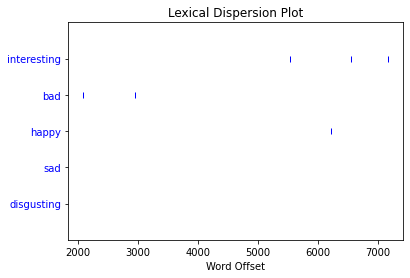

In [ ]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
TV_text.dispersion_plot(['interesting','bad', 'happy', 'sad' ,'disgusting'])
sns.set() #Re-enabling seaborn

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">Construct cells immediately below this that filter, stem and lemmatize the tokens in your corpus, and then creates plots (with titles and labels) that map the word frequency distribution, word probability distribution, and at least two conditional probability distributions that help us better understand the social and cultural game underlying the production of your corpus. Create a wordl of words (or normalized words) and add a few vague comments about what mysteries are revealed through it.</span>

In [ ]:
def getText(source_text, maxFiles):
    #We are setting a max so our examples don't take too long to run
    
    #For converting to a DataFrame
    releasesDict = {
        'text' : [],
    }

    for fileDict in source_text[1:maxFiles]:
        releasesDict['text'].append(fileDict)

    return pandas.DataFrame(releasesDict)

whReleases = getText(clean_02, maxFiles = 10)
whReleases[:5]

,text
0,"@@6409139 [theme_music_plays] coughs , wheezes..."
1,@@4604766 I didn't say you were the murderer ....
2,@@4602902 Will you get off my back ? I don't t...
3,@@4348586 Our new exchange lifeguard from the ...
4,@@4348568 Welcome to rookie school . The Gaunt...


In [ ]:
whReleases['tokenized_text'] = whReleases['text'].apply(lambda x: word_tokenize(x))

# Drop elements like @@6409139
for item in whReleases['tokenized_text']:
    item.pop(0)
whReleases

,text,tokenized_text
0,"@@6409139 [theme_music_plays] coughs , wheezes...","[theme_music_plays, coughs, wheezes, man_over_..."
1,@@4604766 I didn't say you were the murderer ....,"[I, did, n't, say, you, were, the, murderer, I..."
2,@@4602902 Will you get off my back ? I don't t...,"[Will, you, get, off, my, back, I, do, n't, ta..."
3,@@4348586 Our new exchange lifeguard from the ...,"[Our, new, exchange, lifeguard, from, the, lan..."
4,@@4348568 Welcome to rookie school . The Gaunt...,"[Welcome, to, rookie, school, The, Gauntlet, i..."
5,@@4049637 O'Brien to Sisko . Go ahead . We've ...,"[O'Brien, to, Sisko, Go, ahead, We, 've, swept..."
6,"@@4201088 - The time is 0500 . - Yeah , all ri...","[The, time, is, 0500, Yeah, all, right, Julian..."
7,"@@161947 Captain's Log , Stardate 50537.2 . Ro...","[Captain, 's, Log, Stardate, 50537.2, Routine,..."
8,"@@3552690 Stop it ! Selfish , inconsiderate . ...","[Stop, it, Selfish, inconsiderate, Good, morni..."


In [ ]:
whReleases['word_counts'] = whReleases['tokenized_text'].apply(lambda x: len(x))
whReleases['word_counts']

0     7327
1     7825
2     8335
3     3016
4     3265
5    10003
6     7225
7     4691
8     8993
Name: word_counts, dtype: int64

We can remove these stopwords from the analysis by fiat, but we could also take a more principled approach by looking at the frequency distribution of words and selecting a specific cut-off associated with the preservation of 'meaningful words' identified upon inspection. Alternatively, we could automatically set a cut-off by rule, such as removal of all words more frequent then the most frequent verb, or the most frequent noun (not pronoun), or some term of central interest. 

In [ ]:
countsDict = {}
for word in whReleases['tokenized_text'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:450]

[('I', 2423),
 ('the', 1878),
 ('you', 1840),
 ('to', 1546),
 ('a', 1148),
 ("'s", 936),
 ('it', 809),
 ('that', 790),
 ("n't", 769),
 ('of', 734),
 ('and', 569),
 ('in', 562),
 ('is', 551),
 ('do', 532),
 ('me', 485),
 ('have', 478),
 ('You', 453),
 ('be', 432),
 ('for', 428),
 ('on', 414),
 ('was', 390),
 ('your', 385),
 ('this', 363),
 ('we', 332),
 ("'m", 329),
 ('It', 296),
 ('he', 295),
 ('with', 289),
 ('my', 286),
 ('know', 286),
 ("'re", 283),
 ('not', 273),
 ('what', 271),
 ('are', 269),
 ("'ve", 265),
 ('all', 258),
 ('What', 249),
 ('about', 248),
 ("'ll", 239),
 ('The', 228),
 ('We', 225),
 ('just', 222),
 ('will', 213),
 ('there', 206),
 ('sir', 204),
 ('would', 199),
 ('did', 195),
 ('at', 194),
 ('can', 192),
 ('right', 192),
 ('And', 189),
 ('one', 182),
 ('No', 182),
 ('here', 182),
 ('get', 181),
 ('up', 181),
 ('like', 180),
 ('But', 172),
 ('think', 169),
 ('Yes', 167),
 ('him', 167),
 ('Oh', 166),
 ('That', 166),
 ('Well', 166),
 ('if', 165),
 ('but', 164),
 ('Mr'

We can look at this and pick the cutoff, often at the first noun. So we will cut all words before `'Dudek'`.

In [ ]:
#The stop list is then all words that occur before the first noun
stop_words_freq = []
for word, count in word_counts:
    if word == 'murder':
        break
    else:
        stop_words_freq.append(word)
stop_words_freq

['I',
 'the',
 'you',
 'to',
 'a',
 "'s",
 'it',
 'that',
 "n't",
 'of',
 'and',
 'in',
 'is',
 'do',
 'me',
 'have',
 'You',
 'be',
 'for',
 'on',
 'was',
 'your',
 'this',
 'we',
 "'m",
 'It',
 'he',
 'with',
 'my',
 'know',
 "'re",
 'not',
 'what',
 'are',
 "'ve",
 'all',
 'What',
 'about',
 "'ll",
 'The',
 'We',
 'just',
 'will',
 'there',
 'sir',
 'would',
 'did',
 'at',
 'can',
 'right',
 'And',
 'one',
 'No',
 'here',
 'get',
 'up',
 'like',
 'But',
 'think',
 'Yes',
 'him',
 'Oh',
 'That',
 'Well',
 'if',
 'but',
 'Mr',
 'He',
 'no',
 'been',
 "'d",
 'so',
 'see',
 'were',
 'could',
 'out',
 'had',
 'they',
 'from',
 'his',
 'time',
 'an',
 'back',
 'as',
 'her',
 'got',
 'has',
 'go',
 'very',
 'Lieutenant',
 'us',
 'them',
 'now',
 'want',
 'If',
 'So',
 'our',
 'any',
 'Do',
 'when',
 'going',
 'They',
 'how',
 'need',
 'way',
 'good',
 'take',
 'say',
 'make',
 'sure',
 'should',
 'or',
 'some',
 'ca',
 'Now',
 'tell',
 'she',
 'There',
 'by',
 'She',
 'who',
 'then',
 'mus

Now we can create our function to normalize the tokens.

You can see that in the final step of normalizing, we add the lemmatized form of the word. spaCy's built in lemmatizer does this (https://spacy.io/api/lemmatizer). Lemmatization can be thought of as finding the root or the base of the word after removing inflections and other variations of words. Another possible way of finding the roots of words is using NLTK's porting or stemming functionalities, but we will not be getting into them.

In [ ]:
def normalizeTokens(word_list, extra_stop=[]):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized

In [ ]:
whReleases['normalized_tokens'] = whReleases['tokenized_text'].apply(lambda x: normalizeTokens(x))

whReleases['normalized_tokens_count'] = whReleases['normalized_tokens'].apply(lambda x: len(x))

whReleases

,text,tokenized_text,word_counts,normalized_tokens,normalized_tokens_count
0,"@@6409139 [theme_music_plays] coughs , wheezes...","[theme_music_plays, coughs, wheezes, man_over_...",7327,"[theme_music_plays, cough, wheezes, man_over_p...",2651
1,@@4604766 I didn't say you were the murderer ....,"[I, did, n't, say, you, were, the, murderer, I...",7825,"[murderer, say, murderer, wait, listen, accide...",3104
2,@@4602902 Will you get off my back ? I don't t...,"[Will, you, get, off, my, back, I, do, n't, ta...",8335,"[kind, lip, big, favor, check, people, lieuten...",3164
3,@@4348586 Our new exchange lifeguard from the ...,"[Our, new, exchange, lifeguard, from, the, lan...",3016,"[new, exchange, lifeguard, land, sort, cross, ...",1202
4,@@4348568 Welcome to rookie school . The Gaunt...,"[Welcome, to, rookie, school, The, Gauntlet, i...",3265,"[welcome, rookie, school, gauntlet, lifeguard,...",1319
5,@@4049637 O'Brien to Sisko . Go ahead . We've ...,"[O'Brien, to, Sisko, Go, ahead, We, 've, swept...",10003,"[o'brien, sisko, ahead, ve, sweep, level, sign...",3907
6,"@@4201088 - The time is 0500 . - Yeah , all ri...","[The, time, is, 0500, Yeah, all, right, Julian...",7225,"[time, yeah, right, julian, yes, sure, big, da...",2690
7,"@@161947 Captain's Log , Stardate 50537.2 . Ro...","[Captain, 's, Log, Stardate, 50537.2, Routine,...",4691,"[captain, log, stardate, routine, scan, uninha...",1799
8,"@@3552690 Stop it ! Selfish , inconsiderate . ...","[Stop, it, Selfish, inconsiderate, Good, morni...",8993,"[stop, selfish, inconsiderate, good, morning, ...",3507


Now that it is cleaned we start analyzing the dataset. Lets start looking at all the materials together. The [`ConditionalFreqDist`](http://www.nltk.org/api/nltk.html#nltk.probability.ConditionalProbDist) class reads in an iterable of tuples, the first element is the condition and the second the focal word. For starters, we will use word lengths as the conditions, but tags or clusters will provide more useful results.

In [ ]:
#.sum() adds together the lists from each row into a single list
whcfdist = nltk.ConditionalFreqDist(((len(w), w) for w in whReleases['normalized_tokens'].sum()))

#print the number of words
print(whcfdist.N())

23343


From this we can lookup the distributions of different word lengths

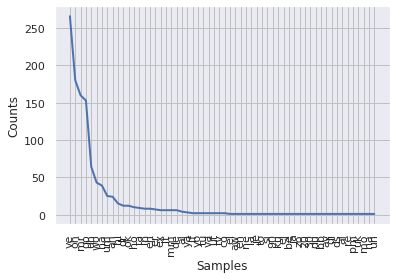

In [ ]:
whcfdist[2].plot()

We can also create a Conditional Probability Distribution or [`ConditionalProbDist`](http://www.nltk.org/api/nltk.html#nltk.probability.ConditionalProbDist) from the `ConditionalFreqDist`. To do this, however, we need a model for the probability distribution. A simple model is [`ELEProbDist`](http://www.nltk.org/api/nltk.html#nltk.probability.ELEProbDist) which gives the expected likelihood estimate for the probability distribution of the experiment used to generate the observed frequency distribution. 

In [ ]:
whcpdist = nltk.ConditionalProbDist(whcfdist, nltk.ELEProbDist)

#print the most common 2 letter word
print(whcpdist[3].max())

#And its probability
print(whcpdist[3].prob(whcpdist[3].max()))

sir
0.08705968242379997


Length is one feature of a word, but there are many more important features we care about. Another critical feature is a word's role in the sentence, or its part of speech (POS). 

The method below works similarly to ```nltk.pos_text```, and can work with the conditional frequency distributions it provides.

In [ ]:
def spacy_pos(word_list):
    tags = []
    doc = nlp(word_list.lower())
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags

In [ ]:
whReleases['normalized_tokens_POS'] = [spacy_pos(t) for t in whReleases['text']]
whReleases[:5]

,text,tokenized_text,word_counts,normalized_tokens,normalized_tokens_count,normalized_tokens_POS
0,"@@6409139 [theme_music_plays] coughs , wheezes...","[theme_music_plays, coughs, wheezes, man_over_...",7327,"[theme_music_plays, cough, wheezes, man_over_p...",2651,"[(@@6409139, JJ), ([, -LRB-), (theme_music_pla..."
1,@@4604766 I didn't say you were the murderer ....,"[I, did, n't, say, you, were, the, murderer, I...",7825,"[murderer, say, murderer, wait, listen, accide...",3104,"[(@@4604766, UH), (i, PRP), (did, VBD), (n't, ..."
2,@@4602902 Will you get off my back ? I don't t...,"[Will, you, get, off, my, back, I, do, n't, ta...",8335,"[kind, lip, big, favor, check, people, lieuten...",3164,"[(@@4602902, NNP), (will, MD), (you, PRP), (ge..."
3,@@4348586 Our new exchange lifeguard from the ...,"[Our, new, exchange, lifeguard, from, the, lan...",3016,"[new, exchange, lifeguard, land, sort, cross, ...",1202,"[(@@4348586, IN), (our, PRP$), (new, JJ), (exc..."
4,@@4348568 Welcome to rookie school . The Gaunt...,"[Welcome, to, rookie, school, The, Gauntlet, i...",3265,"[welcome, rookie, school, gauntlet, lifeguard,...",1319,"[(@@4348568, NNP), (welcome, VBP), (to, IN), (..."


This gives us a new column with the part of speech as a short initialism and the word in a tuple, exactly how the `nltk.ConditionalFreqDist()` function wants them. We can now construct another conditional frequency distribution.

In [ ]:
whcfdist_WordtoPOS = nltk.ConditionalFreqDist(whReleases['normalized_tokens_POS'].sum())
list(whcfdist_WordtoPOS.items())[20:30]

[('orbit', FreqDist({'NN': 1})),
 ('pass', FreqDist({'NN': 4, 'VB': 2})),
 ('in', FreqDist({'IN': 546, 'NN': 1, 'RB': 19, 'RP': 21})),
 ('five', FreqDist({'CD': 19})),
 ('minutes', FreqDist({'NNS': 30})),
 ('prepare', FreqDist({'VB': 9, 'VBP': 1})),
 ('for', FreqDist({'IN': 455})),
 ('landing', FreqDist({'NN': 1})),
 ('yes', FreqDist({'NN': 1, 'UH': 193})),
 ('sir', FreqDist({'NN': 45, 'NNP': 193}))]

This gives the frequency of each word as each part of speech...which can be uninformative and boring. What we want is the converse; the frequency of each part of speech for each word.

In [ ]:
whcfdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in whReleases['normalized_tokens_POS'].sum())
whcfdist_POStoWord

ConditionalFreqDist(nltk.probability.FreqDist,
                    {'$': FreqDist({'$': 3}),
                     "''": FreqDist({'"': 84,
                               "'": 31,
                               "i'ii": 10,
                               'womanoverp.a': 1}),
                     ',': FreqDist({'!': 1,
                               ',': 3338,
                               '-': 2,
                               '?': 5,
                               '@': 1,
                               'odo': 1}),
                     '-LRB-': FreqDist({'(': 3, '[': 291}),
                     '-RRB-': FreqDist({')': 3, ']': 291}),
                     '.': FreqDist({'!': 359,
                               '.': 6574,
                               '...': 55,
                               '?': 1521}),
                     ':': FreqDist({'-': 666,
                               '--': 22,
                               '...': 375,
                               ':': 19,
                

We can now identify and collect all of the superlative adjectives

In [ ]:
whcfdist_POStoWord['JJ']

FreqDist({'-': 11,
          '14th': 1,
          '6th': 1,
          '7th': 3,
          '@@6409139': 1,
          'ablative': 2,
          'able': 18,
          'about': 4,
          'absolute': 2,
          'abstract': 1,
          'absurd': 1,
          'accessible': 1,
          'accommodating': 1,
          'active': 1,
          'acute': 1,
          'adequate': 1,
          'admirable': 1,
          'advanced': 3,
          'afraid': 29,
          'aft': 1,
          'aftershave': 1,
          'aggressive': 2,
          'alarming': 1,
          'alive': 9,
          'alleged': 1,
          'almighty': 1,
          'alone': 7,
          'alternative': 1,
          'amazing': 2,
          'ambient': 1,
          'american': 1,
          'amicable': 1,
          'ample': 1,
          'amusing': 1,
          'ancient': 8,
          'angry': 4,
          'annoyed': 1,
          'anonymous': 1,
          'anxious': 1,
          'appropriate': 2,
          'arab': 1,
          'arabic

Or look at the most common nouns

In [ ]:
whcfdist_POStoWord['NN'].most_common(5)

[('time', 132), ('way', 93), ('something', 85), ('man', 82), ('night', 60)]

Or plot the base form verbs against their number of occurrences

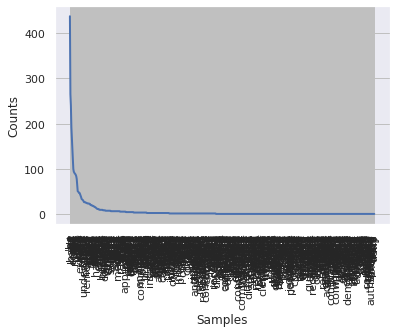

In [ ]:
whcfdist_POStoWord['VB'].plot()

We can then do a similar analysis of the word probabilities

In [ ]:
whcpdist_POStoWord = nltk.ConditionalProbDist(whcfdist_POStoWord, nltk.ELEProbDist)

#print the most common nouns
print(whcpdist_POStoWord['NN'].max())

#And its probability
print(whcpdist_POStoWord['NN'].prob(whcpdist_POStoWord['NN'].max()))

time
0.016082048792329166


We can even create a...wait for it...*WORD CLOUD* or Wordl to gaze at and draw mystical, approximate inferences about important nouns and verbs in our corpus:

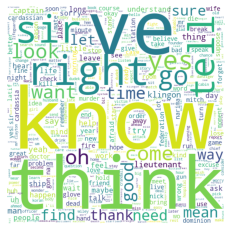

In [ ]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(whReleases['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("whitehouse_word_cloud.pdf", format = 'pdf')

## Davies Corpora

Now that we have our basic cleaning down, we can arrange our Davies Corpora. Let us try this with the movies corpora we have already loaded.

We'll use a smaller corpus of a 1000 movies for this demonstration.

In [ ]:
zfile = zipfile.ZipFile(corpus_name + "/sources_tv.zip")
source = []

In [ ]:
for file in zfile.namelist():
    with zfile.open(file) as f:
        for line in f:
            source.append(line)

In [ ]:
source[0:10]

[b'textID\tfileID\t#words\tgenre\tyear\tcountry\tlanguage(s)\tseriesID\timdb\tseries\tepisodeTitle\r\n',
 b'-----\t-----\t-----\t-----\t-----\t-----\t-----\t-----\t-----\t------\t------\r\n',
 b'\r\n',
 b'2170814\t6814479\t4094\tComedy\t2012\tAustralia\tEnglish\t2170814\t2164274\tA Moody Christmas\tDecapod Crustaceans\r\n',
 b"2170806\t6814480\t4354\tComedy\t2012\tAustralia\tEnglish\t2170806\t2164274\tA Moody Christmas\tI'm Walt Roskow\r\n",
 b'2170796\t6814482\t3635\tComedy\t2012\tAustralia\tEnglish\t2170796\t2164274\tA Moody Christmas\tLast Minute Airfare\r\n',
 b'2170816\t6814478\t3969\tComedy\t2012\tAustralia\tEnglish\t2170816\t2164274\tA Moody Christmas\tOperation Sex Via the Homeless\r\n',
 b'2170800\t6814477\t4381\tComedy\t2012\tAustralia\tEnglish\t2170800\t2164274\tA Moody Christmas\tSeparate Seats\r\n',
 b'2170820\t6814481\t4191\tComedy\t2012\tAustralia\tEnglish\t2170820\t2164274\tA Moody Christmas\tWater Under the Bridge\r\n',
 b'2281428\t5789799\t4434\tDrama\t2013\tAustralia

It looks dirty because the file is encoded as bytes, but we can certainly see the information there. The file id is also present in the original raw text data: as the first "word". Look back at the normalized/tokenized words to confirm that. We're going to use this to create a dataframe with: Fileid, movie name, genre, year, and country.

It is advised that you run a similar check of the source file before you do other extraction.

First, let us create a dictionary mapping file-id to all the text. Each movie will be mapped to a list of the tokenized words.

In this example, I only use it to load 100 movies. You can comment this out or increase/decrease the number as you see fit.

In [ ]:
movie_texts = {}

In [ ]:
for files in TV_raw:
    if len(movie_texts) > 100:
        break
    movies = clean_raw_text(TV_raw[files][1:])
    for movie in movies:
        txts = lucem_illud.word_tokenize(movie)
        try:
            movie_texts[txts[0][2:]] = txts[1:]
        except IndexError:
            continue

In [ ]:
import pandas as pd

In [ ]:
movie_df = pd.DataFrame(columns=["Movie Name", "Genre", "Year", "Country", "Tokenized Texts"])

In [ ]:
for movie in source[3:]:
    try:
        textID, fileID, words, genre, year, country, language, seriesID, imdb, series, episodeTitle = movie.decode("utf-8").split("\t")
    except UnicodeDecodeError:
        continue
    try:
        movie_df.loc[fileID.strip()] = [series.strip(), genre.strip(), year.strip(), country.strip(), movie_texts[fileID.strip()]]
    except KeyError:
        continue

In [ ]:
movie_df.head()

,Movie Name,Genre,Year,Country,Tokenized Texts
6814477,A Moody Christmas,Comedy,2012,Australia,"[WOMAN, ON, LOUDSPEAKER, Final, call, for, Fli..."
5572381,A Place to Call Home,Drama,2013,Australia,"[I, love, you, so, much, You, do, n't, have, t..."
6319680,A Place to Call Home,Drama,2015,Australia,"[Here, Last, season, on, A, Place, to, Call, H..."
4367516,Farscape,"Adventure, Drama, Sci-Fi",2001,Australia,"[Just, keep, going, follow, the, nexus, coordi..."
4359043,Farscape,"Adventure, Drama, Sci-Fi",2002,Australia,"[Previously, on, Farscape, I, will, find, them..."


## <span style="color:red">*Your turn*</span>

<span style="color:red">In the cells immediately following, perform POS tagging on a meaningful (but modest) subset of a corpus associated with your final project. Examine the list of words associated with at least three different parts of speech. Consider conditional associations (e.g., adjectives associated with nouns or adverbs with verbs of interest). What do these distributions suggest about your corpus?

Grabbing the 10 highest scoring posts and tokenizing the sentences. Once again, notice that we aren't going to do any kind of stemming this week (although *semantic* normalization may be performed where we translate synonyms into the same focal word). Here, we will use sentences tokenized by spaCy. Like before, these methods can also be found in lucem_illud.



In [ ]:
redditDF = pandas.read_csv('/content/drive/My Drive/Colab Notebooks/Sentiment.csv')
redditDF[:5]

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,name,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,I_Am_Kenzi,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,PeacefulQuest,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,PussssyCroook,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,MattFromTexas31,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,sharonDay5,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [ ]:
def sent_tokenize(word_list):
    doc = nlp(word_list)
    sentences = [sent.string.strip() for sent in doc.sents]
    return sentences

In [ ]:
# redditTopScores = redditDF.sort_values('retweet_count')[-10:]
redditTopScores = redditDF.sort_values('retweet_count')[-100:]
redditTopScores['sentences'] = redditTopScores['text'].apply(lambda x: [word_tokenize(s) for s in sent_tokenize(x)])
redditTopScores.index = range(len(redditTopScores) - 1, -1,-1) #Reindex to make things nice in the future
redditTopScores

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,name,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone,sentences
99,3274,Scott Walker,1.0000,yes,1.0000,Negative,0.6662,Abortion,0.6892,NaN,SpicyMustang,NaN,607,NaN,NaN,RT @fakedansavage: American Women: Given a cho...,NaN,2015-08-07 09:20:58 -0700,629688692987179009,"Montana, USA",Pacific Time (US & Canada),"[[RT, @fakedansavage, American, Women, Given, ..."
98,277,No candidate mentioned,1.0000,yes,1.0000,Negative,1.0000,Abortion,1.0000,NaN,willowalmighty,NaN,608,NaN,NaN,RT @amaraconda: FETUSES ARE NOT UNBORN BABIES ...,NaN,2015-08-07 09:52:42 -0700,629696680821174272,NaN,Atlantic Time (Canada),"[[RT, @amaraconda], [FETUSES, ARE, NOT, UNBORN..."
97,2388,No candidate mentioned,0.4171,yes,0.6458,Neutral,0.6458,None of the above,0.4171,NaN,Koi26,NaN,612,NaN,NaN,RT @Andy: WHY AM I NOT MODERATING THE #GOPDEBA...,NaN,2015-08-07 09:31:09 -0700,629691258483683332,NaN,NaN,"[[RT], [@Andy], [WHY, AM, I, NOT, MODERATING, ..."
96,996,No candidate mentioned,1.0000,yes,1.0000,Negative,0.3685,None of the above,1.0000,NaN,MagicMeeple,NaN,621,NaN,NaN,RT @nerdist: I gotta say it's refreshing to he...,NaN,2015-08-07 09:46:10 -0700,629695037094256640,"Phoenix, AZ, USA",Pacific Time (US & Canada),"[[RT, @nerdist], [I, got, ta, say, it, 's, ref..."
95,5215,Jeb Bush,1.0000,yes,1.0000,Neutral,1.0000,None of the above,1.0000,NaN,StevanMiller2,NaN,626,NaN,NaN,"RT @BettyBowers: Jeb Bush: ""Obama is at fault,...",NaN,2015-08-07 08:38:35 -0700,629678029216722944,NaN,NaN,"[[RT], [@BettyBowers, Jeb, Bush], [Obama, is, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,803,No candidate mentioned,1.0000,yes,1.0000,Negative,0.6813,None of the above,1.0000,NaN,KarenHoy1,NaN,3946,NaN,NaN,RT @AdamSmith_USA: democrats watching the #GOP...,NaN,2015-08-07 09:47:58 -0700,629695489819066368,Nanaimo,NaN,"[[RT, @AdamSmith_USA, democrats, watching, the..."
3,42,No candidate mentioned,1.0000,yes,1.0000,Negative,0.6596,None of the above,1.0000,NaN,nathansiegel_,NaN,4006,NaN,NaN,"RT @JamelleMyBelle: Meanwhile, in the White Ho...",NaN,2015-08-07 09:54:33 -0700,629697146019840000,NaN,Eastern Time (US & Canada),"[[RT, @JamelleMyBelle], [Meanwhile, in, the, W..."
2,250,No candidate mentioned,1.0000,yes,1.0000,Positive,0.6395,None of the above,1.0000,NaN,embutkiewicz,NaN,4270,NaN,NaN,RT @BernieSanders: Tom Hanks. Finally. Somebod...,NaN,2015-08-07 09:52:55 -0700,629696733333864452,NaN,NaN,"[[RT, @BernieSanders, Tom, Hanks], [Finally], ..."
1,46,No candidate mentioned,1.0000,yes,1.0000,Negative,0.6591,Racial issues,1.0000,NaN,briaslide,NaN,4416,NaN,NaN,RT @LeKarmaSucre: How the #GOPDebate handled #...,NaN,2015-08-07 09:54:32 -0700,629697140625780736,NaN,Central Time (US & Canada),"[[RT], [@LeKarmaSucre, How, the, GOPDebate, ha..."


In [ ]:
def tag_sents_pos(sentences):
    """
    function which replicates NLTK pos tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for token in sent:
            pos_sent.append((token.text, token.tag_))
        pos_sents.append(pos_sent)
    
    return pos_sents

In [ ]:
redditTopScores['POS_sents'] = redditTopScores['sentences'].apply(lambda x: tag_sents_pos(x))

In [ ]:
redditTopScores['POS_sents']

99    [[(RT, NNP), (@fakedansavage, VBZ), (American,...
98    [[(RT, NNP), (@amaraconda, NNP), (FETUSES, NNS...
97    [[(RT, NNP)], [(@Andy, NNP), (WHY, WRB), (AM, ...
96    [[(RT, NNP), (@nerdist, VBP)], [(I, PRP), (got...
95    [[(RT, NNP), (@BettyBowers, NNPS)], [(Jeb, NNP...
                            ...                        
4     [[(RT, NNP), (@AdamSmith_USA, :), (democrats, ...
3     [[(RT, NNP), (@JamelleMyBelle, NNP)], [(Meanwh...
2     [[(RT, NNP), (@BernieSanders, NNP)], [(Tom, NN...
1     [[(RT, NNP)], [(@LeKarmaSucre, VBZ), (How, WRB...
0     [[(RT, NNP), (@HillaryClinton, NNP)], [(Watch,...
Name: POS_sents, Length: 100, dtype: object

And count the number of `NN` (nouns)

In [ ]:
countTarget = 'VBD'
targetCounts = {}
for entry in redditTopScores['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('did', 6),
 ('was', 5),
 ('made', 3),
 ('said', 3),
 ('were', 2),
 ('Given', 1),
 ('HAD', 1),
 ('WAS', 1),
 ('changed', 1),
 ('spent', 1),
 ('gave', 1),
 ('got', 1),
 ('had', 1),
 ('seen', 1),
 ('tried', 1),
 ('chose', 1),
 ('began', 1),
 ('happened', 1),
 ('came', 1),
 ('received', 1)]

What about the adjectives that modify the word, "computer"?


In [ ]:
NTarget = 'RB'
Word = 'said'
NResults = set()
for entry in redditTopScores['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)     

{'literally', 'just'}


In [ ]:
# This time, I consider "VB"
countTarget = 'VB'
targetCounts = {}
for entry in redditTopScores['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('GOPDebate', 11),
 ('be', 9),
 ('have', 5),
 ('get', 4),
 ('say', 3),
 ('hear', 3),
 ('clean', 2),
 ('break', 2),
 ('choose', 2),
 ('watch', 2),
 ('pro', 1),
 ('STOP', 1),
 ('care', 1),
 ('live', 1),
 ('die', 1),
 ('bear', 1),
 ('see', 1),
 ('exist', 1),
 ('go', 1),
 ('kill', 1)]

In [ ]:
NTarget = 'NN'
Word = 'hear'
NResults = set()
for entry in redditTopScores['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)     

set()


In [ ]:
# This time, I consider ""
countTarget = 'DT'
targetCounts = {}
for entry in redditTopScores['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('the', 53),
 ('a', 40),
 ('The', 8),
 ('this', 7),
 ('an', 4),
 ('all', 3),
 ('No', 3),
 ('these', 3),
 ('THE', 2),
 ('This', 2),
 ('no', 2),
 ('any', 2),
 ('that', 2),
 ('THIS', 1),
 ('A', 1),
 ('every', 1),
 ('some', 1)]

In [ ]:
NTarget = 'NN'
Word = 'the'
NResults = set()
for entry in redditTopScores['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)     

{'masterpiece'}


In [ ]:
NTarget = 'NN'
Word = 'get'
NResults = set()
for entry in redditTopScores['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)     

set()


## <span style="color:red">*Exercise 3*</span>

<span style="color:red">Construct cells immediately below this that identify statistically significant bigrams, trigrams, quadgrams, higher-order *n*grams and skipgrams. Explore whether these collocations are idiomatic and so irreducible to the semantic sum of their component words. You can do this by examination of conditional frequencies (e.g., what else is 'united' besides the 'United States'). If these phrases are idiomatic, what do they suggest about the culture of the world producing them?

<span style="color:red">**Stretch**: In Manning and Schütze's textbook, there Section 5.3.2 explores how to use the *t*-test to find words whose co-occurance patterns best distinguish two words. Implement that and use it to explore phrases in your corpus. For instance, you could tell what words come after "America" much more often than after "Iraq"?</span> 

In [ ]:
whBigrams = nltk.collocations.BigramCollocationFinder.from_words(whReleases['normalized_tokens'].sum())
print("There are {} bigrams in the finder".format(whBigrams.N))

There are 23343 bigrams in the finder


To compare the bigrams we need to tell nltk what our score function is. Initially, we will look at the raw counts.

In [ ]:
def bigramScoring(count, wordsTuple, total):
    return count

print(whBigrams.nbest(bigramScoring, 10))

[('ve', 'get'), ('m', 'sure'), ('yes', 'sir'), ('m', 'sorry'), ('gon', 'na'), ('mr', 'danziger'), ('mr', 'clayton'), ('mr', 'dudek'), ('m', 'afraid'), ('look', 'like')]


One note about how `BigramCollocationFinder` works. It doesn't use the strings internally.

In [ ]:
birgramScores = []

def bigramPrinting(count, wordsTuple, total):
    global birgramScores
    birgramScores.append("The first word is:  {}, The second word is: {}".format(*wordsTuple))
    #Returns None so all the tuples are considered to have the same rank

whBigrams.nbest(bigramPrinting, 10)
print('\n'.join(birgramScores[:10]))

The first word is:  1, The second word is: 1
The first word is:  1, The second word is: 1
The first word is:  1, The second word is: 3
The first word is:  3, The second word is: 4
The first word is:  4, The second word is: 13
The first word is:  13, The second word is: 23
The first word is:  23, The second word is: 6
The first word is:  6, The second word is: 23
The first word is:  23, The second word is: 15
The first word is:  15, The second word is: 2


The words are each given numeric IDs and there is a dictionary that maps the IDs to the words they represent. This is a common performance optimization.

Two words can appear together by chance. Recall from  Manning and Schütze's textbook that a t-value can be computed for each bigram to see how significant the association is. You may also want to try computing the $\chi^2$, likelihood ratio, and pointwise mutual information statistics. 

In [ ]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
whBigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]
# other options include student_t, chi_sq, likelihood_ratio, pmi

[(('gon', 'na'), 417.2368079479035),
 (('ve', 'get'), 308.322951991546),
 (('m', 'sure'), 266.4812492437702),
 (('m', 'sorry'), 255.84723791978126),
 (('mr', 'danziger'), 244.2993203438627),
 (('pah', 'wraith'), 190.51827312748443),
 (('mr', 'clayton'), 189.99046655373957),
 (('yes', 'sir'), 179.12825174825707),
 (('pre', 'criminal'), 178.10171884134434),
 (('ho', 'renge'), 175.1050622344424),
 (('myo', 'ho'), 175.1050622344424),
 (('nam', 'myo'), 175.1050622344424),
 (('pon', 'farr'), 168.40306809275918),
 (('rookie', 'school'), 159.577864475385),
 (('mr', 'dudek'), 159.3621133471307),
 (('golden', 'koran'), 158.31924877010547),
 (('renge', 'nam'), 146.48819773188842),
 (('m', 'afraid'), 135.7716408810839),
 (('alpha', 'quadrant'), 124.48535403380711),
 (('wan', 'na'), 117.35550784569847),
 (('tomlin', 'dudek'), 116.06858667063189),
 (('las', 'vegas'), 113.14729359916964),
 (('mr', 'worf'), 113.06987502621935),
 (('year', 'ago'), 107.02221736438736),
 (('powder', 'mark'), 106.03602981

We can also look at trigrams

In [ ]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
whTrigrams = nltk.collocations.TrigramCollocationFinder.from_words(whReleases['normalized_tokens'].sum())
whTrigrams.score_ngrams(trigram_measures.student_t)[:20]

[(('myo', 'ho', 'renge'), 3.1622770798228275),
 (('nam', 'myo', 'ho'), 3.1622770798228275),
 (('ho', 'renge', 'nam'), 2.9999993882620757),
 (('renge', 'nam', 'myo'), 2.9999993882620757),
 (('m', 'gon', 'na'), 2.449199591236294),
 (('oh', 'oh', 'oh'), 2.445120274914689),
 (('hey', 'hey', 'hey'), 2.2360384828341395),
 (('klingon', 'high', 'council'), 1.9999570559977071),
 (('lieutenant', 'commander', 'worf'), 1.9998865012041966),
 (('mouth', 'mouth', 'resuscitation'), 1.7320504897005276),
 (('detective', 'sergeant', 'haver'), 1.7320502142146246),
 (('captain', 'log', 'stardate'), 1.732050006540636),
 (('graduate', 'rookie', 'school'), 1.73204989210803),
 (('pulse', 'blood', 'pressure'), 1.7320496547663289),
 (('beauty', 'bring', 'bad'), 1.732047088509185),
 (('klingon', 'task', 'force'), 1.7320289890853477),
 (('find', 'laundry', 'room'), 1.7320193597934712),
 (('mr', 'danziger', 'pulse'), 1.7320114766583963),
 (('couple', 'year', 'ago'), 1.7320114077869204),
 (('ta', 'find', 'glove'), 1

In [ ]:
Ngrams = nltk.ngrams(whReleases['normalized_tokens'].sum(), 4)
Counts = {}
for ngram in list(Ngrams):
    if ngram in Counts.keys():
        Counts[ngram] += 1
    else:
        Counts[ngram] = 1
Filtered = {}
for key in Counts.keys():
    if Counts[key] < 2:
        pass
    else:
        Filtered[key] = Counts[key]
print(Filtered)

{('look', 'forward', 'big', 'event'): 2, ('@electronic_whirring', 'bleeping', 'crandall', 'henck'): 2, ('nicholas', 'crandall', 'otto', 'henck'): 2, ('tell', 'thing', 've', 'change'): 2, ('pre', 'criminal', 'nicholas', 'crandall'): 2, ('murderer', 'say', 'murderer', 'wait'): 2, ('say', 'murderer', 'wait', 'listen'): 2, ('believe', 've', 'absolute', 'bundle'): 2, ('ve', 'absolute', 'bundle', 'nerve'): 2, ('wish', 'figure', 'benefit', 'death'): 2, ('give', 'necessary', 'injection', 'minute'): 2, ('necessary', 'injection', 'minute', 'ago'): 2, ('intent', 'murder', 'pack', 'bag'): 2, ('hearing', 'aid', 'go', 'night'): 2, ('hey', 'hey', 'hey', 'hey'): 2, ('big', 'favor', 'check', 'people'): 2, ('lieutenant', 'wish', 'rude', 'know'): 2, ('wish', 'rude', 'know', 'people'): 2, ('rude', 'know', 'people', 'personally'): 2, ('know', 'people', 'personally', 'resent'): 2, ('people', 'personally', 'resent', 'implication'): 2, ('personally', 'resent', 'implication', 'dealer'): 2, ('get', 'ta', 'find'

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform NER on a (modest) subset of your corpus of interest. List all of the different kinds of entities tagged? What does their distribution suggest about the focus of your corpus? For a subset of your corpus, tally at least one type of named entity and calculate the Precision, Recall and F-score for the NER classification just performed.

# Named-Entity Recognition

Named Entity Recognition (NER) is also a classification task, which identifies named objects. 
Like every other part of the pipeline, spaCy also tags words with their tagged entity (https://spacy.io/api/entityrecognizer). You can see the full capacity of what spaCy does by checking out: https://spacy.io/usage/linguistic-features.

For training the identification of such entities, spaCy uses a deep learning model.

In [ ]:
def tag_sents_ner(sentences):
    """
    function which replicates NLTK ner tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for ent in sent.ents:
            pos_sent.append((ent.text, ent.label_))
        pos_sents.append(pos_sent)
    
    return pos_sents

We can also run NER over our entire corpus:

In [ ]:
redditTopScores['classified_sents'] = redditTopScores['sentences'].apply(lambda x: tag_sents_ner(x))

In [ ]:
redditTopScores['classified_sents']

99                       [[], [(Scott Walker, PERSON)]]
98                                 [[], [], [], [], []]
97                                         [[], [], []]
96                                             [[], []]
95    [[], [(Jeb Bush, PERSON), (Obama, PERSON), (GO...
                            ...                        
4               [[(democrats, NORP), (GOPDebate, ORG)]]
3                        [[], [(the White House, ORG)]]
2     [[], [(Tom Hanks, PERSON)], [(Somebody, PERSON...
1                                          [[], [], []]
0     [[], [(Democrat, NORP)], [(http://t.co/pGlQCqQ...
Name: classified_sents, Length: 100, dtype: object

Find the most common entities (which are, of course, boring):

In [ ]:
entityCounts = {}
for entry in redditTopScores['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if ent in entityCounts:
                entityCounts[ent] += 1
            else:
                entityCounts[ent] = 1
sortedEntities = sorted(entityCounts.items(), key = lambda x: x[1], reverse = True)
sortedEntities[:10]

[('GOPDebate', 20),
 ('tonight', 7),
 ('Ben Carson', 6),
 ('GOP', 4),
 ('Obama', 3),
 ('Donald Trump', 3),
 ('10', 3),
 ('Scott Walker', 2),
 ('one', 2),
 ('Ronald Reagan', 2)]

Or those occurring only twice:

In [ ]:
[x[0] for x in sortedEntities if x[1] == 2]

['Scott Walker',
 'one',
 'Ronald Reagan',
 'Straight Outta Compton',
 'the White House',
 'Hillary',
 'Constitution',
 'Trump']

We could also list the most common "non-objects". (We note that we're not graphing these because there are so few here.)

In [ ]:
nonObjCounts = {}
for entry in redditTopScores['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'ORG':
                continue
            elif ent in nonObjCounts:
                nonObjCounts[ent] += 1
            else:
                nonObjCounts[ent] = 1
sortedNonObj = sorted(nonObjCounts.items(), key = lambda x: x[1], reverse = True)
sortedNonObj[:10]

[('tonight', 7),
 ('Ben Carson', 6),
 ('Obama', 3),
 ('Donald Trump', 3),
 ('10', 3),
 ('Scott Walker', 2),
 ('one', 2),
 ('Ronald Reagan', 2),
 ('Hillary', 2),
 ('Constitution', 2)]

What about the Organizations?

In [ ]:
OrgCounts = {}
for entry in redditTopScores['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'ORG':
                print(ent)

GOPDebate
Twitter GOPDebate
GOPDebate
@foxnews
GOP
GOPDebate
GOPDebate
RT @Squintz1983 GOPDebate
Fox
Straight Outta Compton
Republican Party GOPDebate
the White House
@julieklausner
Fox News GOPDebate
Chris Christie 's
1st GOPDebate
TeamTrump TrumpForPresident
GOPDebate
GOPDebate
GOPDebate
GOPDebate
Article VI
GOP
FOX News
the Republican Party
GOPDebate
GOPDebate
Straight Outta Compton
GOPDebate
GOPDebate
GOPDebate
GOP
GOPDebate
RT @DesiJed
GOPDebate
Dem
GOPDebate
GOPDebate
GOP
Planned Parenthood
GOPDebate
GOPDebate
GOPdebate JonVoyage -H
GOPDebate
the White House


These, of course, have much smaller counts.

In this particular example we didn't find the most interesting entities - you can remedy that in exercise 4!

## <span style="color:red">*Your turn*</span>

<span style="color:red">In the cells immediately following, parse a (modest) subset of your corpus of interest. How deep are the phrase structure and dependency parse trees nested? How does parse depth relate to perceived sentence complexity? What are five things you can extract from these parses for subsequent analysis? (e.g., nouns collocated in a noun phrase; adjectives that modify a noun; etc.) Capture these sets of things for a focal set of words (e.g., "Bush", "Obama", "Trump"). What do they reveal about the roles that these entities are perceive to play in the social world inscribed by your texts?

We will be using spaCy's built in dependancy parser to go about exploring the tree.
Note that unlike previous examples, large corpuses or collections of sentences don't give us as much information, so we will be navigating smaller sentences.

Let us start by exploring noun chunks. Noun chunks are “base noun phrases” – flat phrases that have a noun as their head. You can think of noun chunks as a noun plus the words describing the noun – for example, “the lavish green grass” or “the world’s largest tech fund”. To get the noun chunks in a document, simply iterate over the sentences noun chunks.

## Dependency parsing and graph representations

Dependency parsing was developed to robustly capture linguistic dependencies from text. The complex tags associated with these parses are detailed [here]('http://universaldependencies.org/u/overview/syntax.html'). When parsing with the dependency parser, we will work directly from the untokenized text. Note that no *processing* takes place before parsing sentences--we do not remove so-called stop words or anything that plays a syntactic role in the sentence, although anaphora resolution and related normalization may be performed before or after parsing to enhance the value of information extraction. 

We will be using spaCy's built in dependancy parser to go about exploring the tree.
Note that unlike previous examples, large corpuses or collections of sentences don't give us as much information, so we will be navigating smaller sentences.

Let us start by exploring noun chunks. Noun chunks are “base noun phrases” – flat phrases that have a noun as their head. You can think of noun chunks as a noun plus the words describing the noun – for example, “the lavish green grass” or “the world’s largest tech fund”. To get the noun chunks in a document, simply iterate over the sentences noun chunks.

In [ ]:
from spacy import displacy

In [ ]:
doc = nlp("Autonomous cars shift insurance liability toward manufacturers")

In [ ]:
displacy.render(doc, style='dep')

'<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" id="75832e33368047bca54029327e7ebfbf-0" class="displacy" width="1275" height="312.0" direction="ltr" style="max-width: none; height: 312.0px; color: #000000; background: #ffffff; font-family: Arial; direction: ltr">\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.0">\n    <tspan class="displacy-word" fill="currentColor" x="50">Autonomous</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">ADJ</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.0">\n    <tspan class="displacy-word" fill="currentColor" x="225">cars</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="225">NOUN</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.0">\n    <tspan class="displacy-word" fill="currentColor" x="400">shift</tspan>\n    <tspan class="disp

In [ ]:
for chunk in doc.noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_, chunk.root.head.text)

Autonomous cars cars nsubj shift
insurance liability liability dobj shift
manufacturers manufacturers pobj toward


spaCy uses the terms head and child to describe the words connected by a single arc in the dependency tree. The term dep is used for the arc label, which describes the type of syntactic relation that connects the child to the head. As with other attributes, the value of .dep is a hash value. You can get the string value with .dep_.

For your reference:

Text: The original token text.

Dep: The syntactic relation connecting child to head.

Head text: The original text of the token head.

Head POS: The part-of-speech tag of the token head.

Children: The immediate syntactic dependents of the token.

In [ ]:
for token in doc:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
            [child for child in token.children])

Autonomous amod cars NOUN []
cars nsubj shift VERB [Autonomous]
shift ROOT shift VERB [cars, liability]
insurance compound liability NOUN []
liability dobj shift VERB [insurance, toward]
toward prep liability NOUN [manufacturers]
manufacturers pobj toward ADP []


Because the syntactic relations form a tree, every word has exactly one head. You can therefore iterate over the arcs in the tree by iterating over the words in the sentence. This is usually the best way to match an arc of interest — from below:

In [ ]:
from spacy.symbols import nsubj, VERB

In [ ]:
verbs = set()
for possible_subject in doc:
    if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
        verbs.add(possible_subject.head)
print(verbs)

{shift}


You can *also* navigate from above. It isn't as efficient though.

In [ ]:
verbs = []
for possible_verb in doc:
    if possible_verb.pos == VERB:
        for possible_subject in possible_verb.children:
            if possible_subject.dep == nsubj:
                verbs.append(possible_verb)
                break

In [ ]:
print(verbs)

[shift]


### Iterating around the local tree
A few more convenience attributes are provided for iterating around the local tree from the token. Token.lefts and Token.rights attributes provide sequences of syntactic children that occur before and after the token. Both sequences are in sentence order. There are also two integer-typed attributes, Token.n_lefts and Token.n_rights that give the number of left and right children.

In [ ]:
doc = nlp("bright red apples on the tree")
print([token.text for token in doc[2].lefts])  # ['bright', 'red']
print([token.text for token in doc[2].rights])  # ['on']
print(doc[2].n_lefts)  # 2
print(doc[2].n_rights)  # 1

['bright', 'red']
['on']
2
1


You can get a whole phrase by its syntactic head using the Token.subtree attribute. This returns an ordered sequence of tokens. You can walk up the tree with the Token.ancestors attribute, and check dominance with Token.is_ancestor

In [ ]:
doc = nlp("Credit and mortgage account holders must submit their requests")

root = [token for token in doc if token.head == token][0]
subject = list(root.lefts)[0]
for descendant in subject.subtree:
    assert subject is descendant or subject.is_ancestor(descendant)
    print(descendant.text, descendant.dep_, descendant.n_lefts,
            descendant.n_rights,
            [ancestor.text for ancestor in descendant.ancestors])

Credit nmod 0 2 ['account', 'holders', 'submit']
and cc 0 0 ['Credit', 'account', 'holders', 'submit']
mortgage conj 0 0 ['Credit', 'account', 'holders', 'submit']
account compound 1 0 ['holders', 'submit']
holders nsubj 1 0 ['submit']


Finally, the .left_edge and .right_edge attributes can be especially useful, because they give you the first and last token of the subtree. This is the easiest way to create a Span object for a syntactic phrase. Note that .right_edge gives a token within the subtree — so if you use it as the end-point of a range, don’t forget to +1!

In [ ]:
span = doc[doc[4].left_edge.i : doc[4].right_edge.i+1]
with doc.retokenize() as retokenizer:
    retokenizer.merge(span)
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

Credit and mortgage account holders NOUN nsubj submit
must VERB aux submit
submit VERB ROOT submit
their DET poss requests
requests NOUN dobj submit


In [ ]:
displacy.render(doc, style='dep')

'<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" id="699224e3914d4360b7736fac52256f6d-0" class="displacy" width="925" height="312.0" direction="ltr" style="max-width: none; height: 312.0px; color: #000000; background: #ffffff; font-family: Arial; direction: ltr">\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.0">\n    <tspan class="displacy-word" fill="currentColor" x="50">Credit and mortgage account holders</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">NOUN</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.0">\n    <tspan class="displacy-word" fill="currentColor" x="225">must</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="225">VERB</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.0">\n    <tspan class="displacy-word" fill="currentColor" x="400">submit</tspa

### Information Extraction

How can dependancy graphs be useful? We can extract information from the sentences based on relationships between words within parsed phrases. Let us see if we can do this to glean any information, from, say, our movies dataset. 

How violent are the movies? Who is killing who?

In [ ]:
movie_violences = {}

In [ ]:
for index, row in movie_df.iterrows():
    text = ' '.join(row['Tokenized Texts'])
    movie_violences[row['Movie Name']] = ([], [])
    doc = nlp(text)
    for chunk in doc.noun_chunks:
        subject = 0
        object_ = 0
        # if the verb or the root of the sentence is kill
        if chunk.root.head.text == 'kill':
            # we find the subjects and objects around the word, and if it does exist, add it to the tuple
            if chunk.root.dep_ == 'nsubj':
                subject = chunk.root.text
            if chunk.root.dep_ == 'dobj':
                object_ = chunk.root.text
            if subject is not 0:
                movie_violences[row['Movie Name']][0].append(subject)
            if object_ is not 0:
                movie_violences[row['Movie Name']][1].append(object_)

KeyboardInterrupt: ignored

In [ ]:
movie_violences

That's pretty neat: we can see who tried to kill who, or at least talked about it. A lot of 'I' killing 'you', as we'd imagine. What else can we see?

The movie, about time, which is about time travel, funnily enough has:
`'About Time': (['I'], ['Hitler'])`

## <span style="color:red">*Exercise 6*</span>

<span style="color:red">Construct cells immediately below this that calculate the KL and $\chi^2$ divergences, and the KS and Wasserstein distances between four separate corpora, plot these with heatmaps, and then array them in two dimensions with multidimensional scaling as above. What does this reveal about relations between the corpora? Which analysis (and divergence or distribution) distinguishes the authors or documents better? 

<span style="color:red">**Stretch**: Calculate the <a "href=https://en.wikipedia.org/wiki/Jensen–Shannon_divergence" target="_blank">Jensen-Shannon Divergence</a> between your four corpora. What is the relationship between the KL and JS divergences?</span> 

# Distributional distances

If we want to compare different corpora, we need a distance or divergence that compares the two distributions.

We will use the: 

+ Kullback-Leibler (KL) divergence
+ $\chi^2$ divergence
+ Kolmogorov-Smirnov (KS) distance
+ Wasserstein distance

### Computing ###

To do this we will need to create the arrays, lets compare the Whitehouse releases with the Kennedy releases. First we have to download them and load them into a DataFrame.

In [ ]:
kenReleases = getGithubFiles('https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/raw/Kennedy', maxFiles = 10)
kenReleases[:5]

NameError: ignored

Then we can tokenize, stem and remove stop words, like we did for the Whitehouse press releases

In [ ]:
kenReleases['tokenized_text'] = kenReleases['text'].apply(lambda x: word_tokenize(x))
kenReleases['normalized_tokens'] = kenReleases['tokenized_text'].apply(lambda x: normalizeTokens(x))

Now we need to compare the two collection of words, remove those not found in both, and assign the remaining ones indices.

In [ ]:
whWords = set(whReleases['normalized_tokens'].sum())
kenWords = set(kenReleases['normalized_tokens'].sum())

#Change & to | if you want to keep all words
overlapWords = whWords & kenWords

overlapWordsDict = {word: index for index, word in enumerate(overlapWords)}
overlapWordsDict['student']

128

Now we can count the occurrences of each word in the corpora and create our arrays. Note that we don't have to use numpy arrays as we do here. We could just use a list, but the arrays are faster in numpy so we encourage you to get in the habit of using them.

In [ ]:
def makeProbsArray(dfColumn, overlapDict):
    words = dfColumn.sum()
    countList = [0] * len(overlapDict)
    for word in words:
        try:
            countList[overlapDict[word]] += 1
        except KeyError:
            #The word is not common so we skip it
            pass
    countArray = np.array(countList)
    return countArray / countArray.sum()

whProbArray = makeProbsArray(whReleases['normalized_tokens'], overlapWordsDict)
kenProbArray = makeProbsArray(kenReleases['normalized_tokens'], overlapWordsDict)
kenProbArray.sum()
#There is a little bit of a floating point math error
#but it's too small to see with print and too small matter here

1.0

We can now compute the KL divergence. Pay attention to the asymmetry. Use [the Jensen–Shannon divergence](https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence), which is the average KL divergence between each distribution and the average of both distributions (i.e., the midpoint), if you want symmetry.

In [ ]:
wh_kenDivergence = scipy.stats.entropy(whProbArray, kenProbArray)
print (wh_kenDivergence)
ken_whDivergence = scipy.stats.entropy(kenProbArray, whProbArray)
print (ken_whDivergence)

0.632804454460187
0.5784905983449495


Then, we can do the elementwise calculation and see which words best distinguish the two corpora.

In [ ]:
wh_kenDivergence_ew = scipy.special.kl_div(whProbArray, kenProbArray)
kl_df = pandas.DataFrame(list(overlapWordsDict.keys()), columns = ['word'], index = list(overlapWordsDict.values()))
kl_df = kl_df.sort_index()
kl_df['elementwise divergence'] = wh_kenDivergence_ew
kl_df[:10]

,word,elementwise divergence
0,tax,0.000145
1,deeply,0.001344
2,cover,0.000392
3,april,0.002129
4,clear,0.005727
5,drug,0.001344
6,advance,0.000055
7,irresponsible,0.000055
8,store,0.000073
9,direct,0.002129


In [ ]:
kl_df.sort_values(by='elementwise divergence', ascending=False)[:10]

,word,elementwise divergence
209,iraq,0.094839
51,bush,0.048099
78,american,0.025871
15,stem,0.023705
172,law,0.022781
186,department,0.019537
134,member,0.013240
123,war,0.012655
303,program,0.011213
178,country,0.010187


Now we will apply what we learned today 
First, let's transform every text into normalized tokens. Note that in this first step, no stopword is removed.
We'll use only the first 11 movies: you are welcome to try more.

In [ ]:
corpora = []
for index, row in movie_df.iterrows():
    if len(corpora) > 10:
        break
    corpora.append(row['Tokenized Texts'])

Then, let's separate the normalized tokens into stopwords and non-stopwords.

In [ ]:
corpora_s = []
corpora_nons = []
for corpus in corpora:
    s = []
    nons = []
    doc = nlp(' '.join(corpus))
    for word in doc:
        if word.is_stop:
            s.append(word.text)
        else:
            nons.append(word.text)
    corpora_s.append(s)
    corpora_nons.append(nons)

Define some covenient funtions for calculating divergence and distances.

In [ ]:
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pandas.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pandas.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)

Now we will calculate the KL divergence for each pair of corpora, turn the results into a matrix, and visualize the matrix as a heatmap. Recall that $D_{\mathrm{KL}}(P\|Q)$ measures the amount of information loss when $Q$ is used to approximate $P$. Here, the rows are the $P$s used for calculating KL divergences, and the columns are the $Q$s. So, each cell measures the amount of information loss when the word distribution of the column text is used to approximate the word distribution of the row text. Because the KL divergence is directional, such that the divergence of $P$ from $Q$ is different from the same of $Q$ from $P$, the matrix is assymetric and contains unique information above and below the diagonal. The same is true for the $\chi^2$ divergence.

In [ ]:
len(corpora)

11

In [ ]:
fileids = list(movie_df['Movie Name'])[0:11]

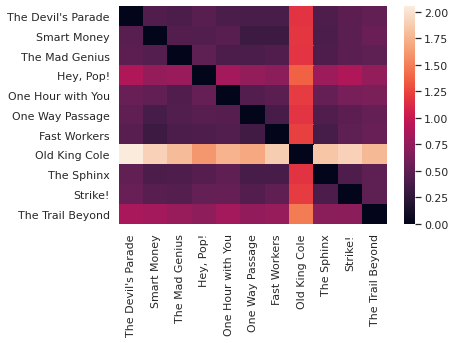

In [ ]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p,q, difference = 'KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()


To reveal more patterns, let's do a multidimensional scaling of the matrix.

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


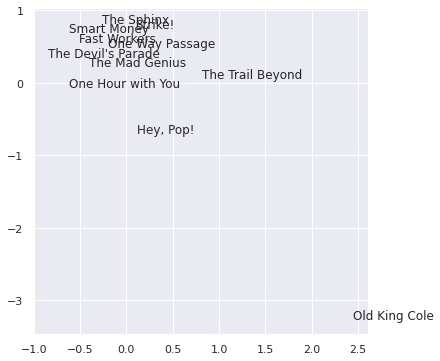

In [ ]:
mds = sklearn.manifold.MDS()
pos = mds.fit(M).embedding_
x = pos[:,0]
y = pos[:,1]
fig, ax = plt.subplots(figsize = (6,6))
plt.plot(x, y, ' ')
for i, txt in enumerate(fileids):
    ax.annotate(txt, (x[i],y[i]))

A co-respondent's course and The Chain Gang are away from the others - any guesses why?

We may just want to focus on the distrbution of stopwords or non-stopwords. Let's do the analysis again first for stopwords and then for non-stopwords.

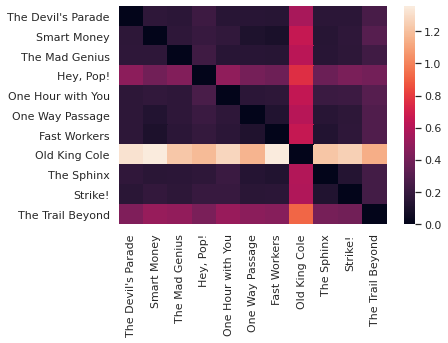

In [ ]:
L = []
for p in corpora_s:
    l = []
    for q in corpora_s:
        l.append(Divergence(p,q, difference='KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

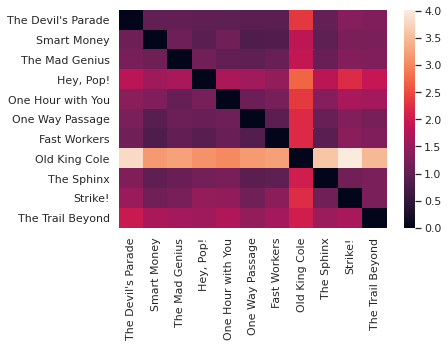

In [ ]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

Now we compute the same for the assymmetric $\chi^2$ Divergence.

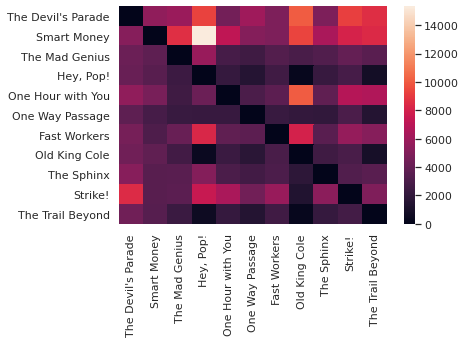

In [ ]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='Chi2'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

For the KS distance:

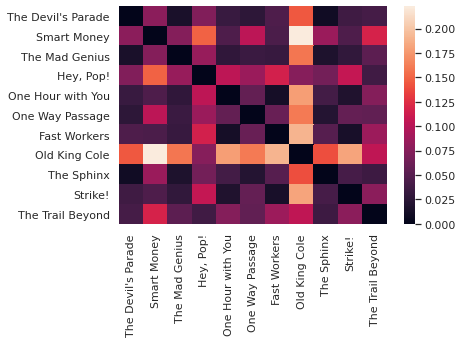

In [ ]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='KS'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

And finally for the Wasserstein or "earth mover's" Distance.

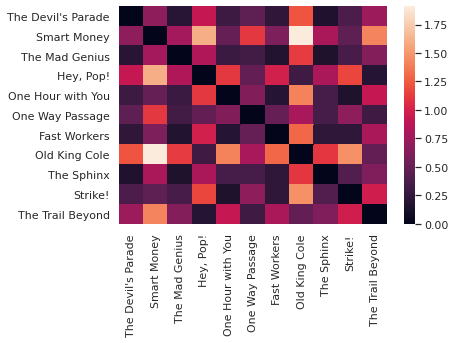

In [ ]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='Wasserstein'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

You can see that decade X is highly divergent and this makes reading the plot somewhat difficult. Let's fix this by taking the log of each cell, which will reduce the distance of decode X from other texts as an outlier.

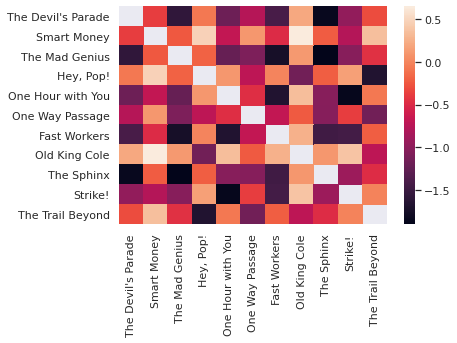

In [ ]:
ax = sns.heatmap(div.apply(np.log).replace([np.inf, -np.inf], np.nan))
plt.show()

We only tried 11 movies, and from the same time period, so our signals might not be too interesting. What about different time periods?

An interesting experiment to maybe get some clearer signals: documents by decade in the Davies Corpus Of Historial American English (COHA) and see if we can detect patterns between them. 

If we want to rerun this on a new data set of our own composition, we can be a bit more efficient with our coding. Let's use the Shakespeare texts from last week as example: 

In [ ]:
shakespeare_df = lucem_illud_2020.loadTextDirectory('../data/Shakespeare')

NameError: ignored

Now we stem and remove stopwords

In [ ]:
shakespeare_df['tokenized_text'] = shakespeare_df['text'].apply(lambda x: word_tokenize(x))
shakespeare_df['normalized_tokens'] = shakespeare_df['tokenized_text'].apply(lambda x: normalizeTokens(x))

Create the corpus file and generate the heatmap:

In [ ]:
measure = 'KS' #"KL", "Chi2", "KS", "Wasserstein"
num_of_texts = 10 #The bigger this number the slower it will run, you can also try selecting your own plays
fileids_sp = list(shakespeare_df[:num_of_texts].index)
corpora_sp = list(shakespeare_df[:num_of_texts]['normalized_tokens'])
L = []
for p in corpora_sp:
    l = []
    for q in corpora_sp:
        l.append(Divergence(p,q, difference=measure))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids_sp, index = fileids_sp)
ax = sns.heatmap(div)
plt.show()

What are "The Passionate Pilgrim" and "The Phoenix and the Turtle"? Little known poems by Shakespeare that are unsurprisingly hard to classify, as they are so different from everything else he wrote.